In [1]:
import matplotlib.pyplot as plt
import sys
import os
import pandas as pd
import shutil
import itertools
HOME_DIR = os.path.expanduser("~")
sys.path.append(f"{HOME_DIR}/spdk/exp-0219/plot")
from utils import *

In [ ]:
res_dir = f"{HOME_DIR}/spdk/exp-0219/result"

keywords = ["multistream", "OP_14", "zipf:0.2"]

result_files = [
    "ALGO_single_group_cb_BS_64k_WP_rand_OP_14_DIS_zipf:0.8.job.out",
    "ALGO_sepgc11_cb_BS_64k_WP_rand_OP_14_DIS_zipf:0.8.job.out",
    "ALGO_sepgc21_cb_BS_64k_WP_rand_OP_14_DIS_zipf:0.8.job.out",
    "ALGO_mida22_cb_BS_64k_WP_rand_OP_14_DIS_zipf:0.8.job.out",
    "ALGO_mida23_cb_BS_64k_WP_rand_OP_14_DIS_zipf:0.8.job.out",
    "ALGO_mida24_cb_BS_64k_WP_rand_OP_14_DIS_zipf:0.8.job.out",
    "ALGO_mida26_cb_BS_64k_WP_rand_OP_14_DIS_zipf:0.8.job.out",
    "ALGO_sepbit22_cb_BS_64k_WP_rand_OP_14_DIS_zipf:0.8.job.out",
    "ALGO_sepbit23_cb_BS_64k_WP_rand_OP_14_DIS_zipf:0.8.job.out",
    "ALGO_sepbit24_cb_BS_64k_WP_rand_OP_14_DIS_zipf:0.8.job.out",
    "ALGO_sepbit26_cb_BS_64k_WP_rand_OP_14_DIS_zipf:0.8.job.out",
]

# for res_file in os.listdir(res_dir):
#     flag = True
#     for keyword in keywords:
#         if keyword not in res_file:
#             flag = False
#     if flag:
#         res_file_path = os.path.join(res_dir, res_file)
#         result_files.append(res_file_path)

# result_files.sort()

result_files = [os.path.join(res_dir, res_file) for res_file in result_files]

print(len(result_files))
print("\n".join(result_files))

IO_ITEMS = ["USER", "COMPACTION", "BASE_MD", "NVC_MD", "L2P"]

11
/users/guntherX/spdk/exp-0219/result/ALGO_single_group_cb_BS_64k_WP_rand_OP_14_DIS_zipf:0.8.job.out
/users/guntherX/spdk/exp-0219/result/ALGO_sepgc11_cb_BS_64k_WP_rand_OP_14_DIS_zipf:0.8.job.out
/users/guntherX/spdk/exp-0219/result/ALGO_sepgc21_cb_BS_64k_WP_rand_OP_14_DIS_zipf:0.8.job.out
/users/guntherX/spdk/exp-0219/result/ALGO_mida22_cb_BS_64k_WP_rand_OP_14_DIS_zipf:0.8.job.out
/users/guntherX/spdk/exp-0219/result/ALGO_mida23_cb_BS_64k_WP_rand_OP_14_DIS_zipf:0.8.job.out
/users/guntherX/spdk/exp-0219/result/ALGO_mida24_cb_BS_64k_WP_rand_OP_14_DIS_zipf:0.8.job.out
/users/guntherX/spdk/exp-0219/result/ALGO_mida26_cb_BS_64k_WP_rand_OP_14_DIS_zipf:0.8.job.out
/users/guntherX/spdk/exp-0219/result/ALGO_sepbit22_cb_BS_64k_WP_rand_OP_14_DIS_zipf:0.8.job.out
/users/guntherX/spdk/exp-0219/result/ALGO_sepbit23_cb_BS_64k_WP_rand_OP_14_DIS_zipf:0.8.job.out
/users/guntherX/spdk/exp-0219/result/ALGO_sepbit24_cb_BS_64k_WP_rand_OP_14_DIS_zipf:0.8.job.out
/users/guntherX/spdk/exp-0219/result/ALGO_s

In [9]:
def plot_io(result_file, metric, save_dir):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir, exist_ok=True)
    read_metric_dict = {}
    write_metric_dict = {}
    for item in IO_ITEMS:
        stat = extract_stat_io(result_file, item)
        read_metric_dict[item] = stat[f"read_{metric}"]
        write_metric_dict[item] = stat[f"write_{metric}"]

    read_metric_df = pd.DataFrame(read_metric_dict)
    write_metric_df = pd.DataFrame(write_metric_dict)
    read_metric_df.to_csv(os.path.join(save_dir, f"read_{metric}.csv"))
    read_metric_df = read_metric_df[int(0.1*read_metric_df.shape[0]):int(0.9*read_metric_df.shape[0])]
    plt.clf()
    plt.xlabel("Time (s)")
    if metric == "bw":
        plt.ylabel("Bandwidth (MB/s)")
    else:
        plt.ylabel("IOPS")
    read_metric_df.plot()
    plt.savefig(os.path.join(save_dir, f"read_{metric}.pdf"))
    write_metric_df.to_csv(os.path.join(save_dir, f"write_{metric}.csv"))
    write_metric_df = write_metric_df[int(0.1*write_metric_df.shape[0]):int(0.9*write_metric_df.shape[0])]
    plt.clf()
    plt.xlabel("Time (s)")
    if metric == "bw":
        plt.ylabel("Bandwidth (MB/s)")
    else:
        plt.ylabel("IOPS")
    write_metric_df.plot()
    plt.savefig(os.path.join(save_dir, f"write_{metric}.pdf"))
    

In [10]:
def plot_stat_waf(result_file, save_dir):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir, exist_ok=True)
    stat = extract_stat_waf(result_file)
    stat_df = pd.DataFrame(stat)
    stat_df.to_csv(os.path.join(save_dir, "stat_waf.csv"))
    stat_df = stat_df[int(0.1*stat_df.shape[0]):int(0.9*stat_df.shape[0])]
    plt.clf()
    stat_df.plot()
    plt.xlabel("Time (s)")
    plt.ylabel("WAF")
    plt.savefig(os.path.join(save_dir, "stat_waf.pdf"))

In [11]:
def plot_overall_waf(result_file, save_dir):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir, exist_ok=True)
    waf, final_waf = extract_overall_waf(result_file)
    stat_df = pd.DataFrame(waf)
    stat_df.to_csv(os.path.join(save_dir, "overall_waf.csv"))
    stat_df = stat_df[int(0.1*stat_df.shape[0]):int(0.9*stat_df.shape[0])]
    plt.clf()
    plt.xlabel("Time (s)")
    plt.ylabel("WAF")
    stat_df.plot()
    plt.savefig(os.path.join(save_dir, "overall_waf.pdf"))
    return waf, final_waf

/users/guntherX/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


                                                param  IOPS  BW(MB/S)  \
0   ALGO_single_group_cb_BS_64k_WP_rand_OP_14_DIS_...  3844     240.0   
1   ALGO_sepgc11_cb_BS_64k_WP_rand_OP_14_DIS_zipf:0.8  4847     303.0   
2   ALGO_sepgc21_cb_BS_64k_WP_rand_OP_14_DIS_zipf:0.8  5089     318.0   
3    ALGO_mida22_cb_BS_64k_WP_rand_OP_14_DIS_zipf:0.8  5173     323.0   
4    ALGO_mida23_cb_BS_64k_WP_rand_OP_14_DIS_zipf:0.8  5091     318.0   
5    ALGO_mida24_cb_BS_64k_WP_rand_OP_14_DIS_zipf:0.8  5046     315.0   
6    ALGO_mida26_cb_BS_64k_WP_rand_OP_14_DIS_zipf:0.8  4916     307.0   
7   ALGO_sepbit22_cb_BS_64k_WP_rand_OP_14_DIS_zipf...  5168     323.0   
8   ALGO_sepbit23_cb_BS_64k_WP_rand_OP_14_DIS_zipf...  5202     325.0   
9   ALGO_sepbit24_cb_BS_64k_WP_rand_OP_14_DIS_zipf...  5193     325.0   
10  ALGO_sepbit26_cb_BS_64k_WP_rand_OP_14_DIS_zipf...  5101     319.0   

     latency  final_waf  
0   33298.18     6.3904  
1   26404.51     5.0098  
2   25147.68     4.7919  
3   24741.64     4.

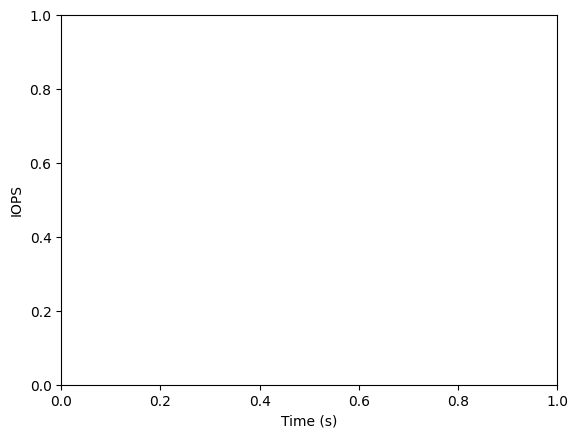

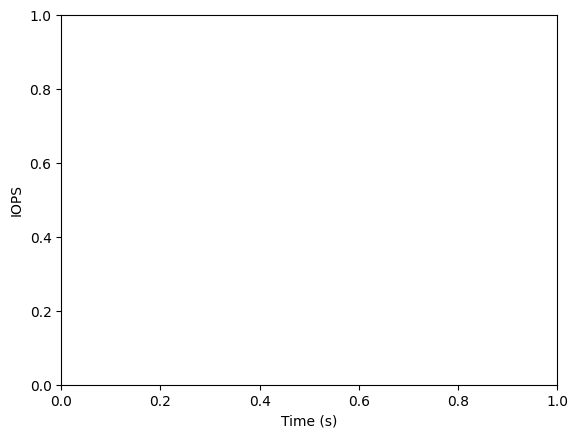

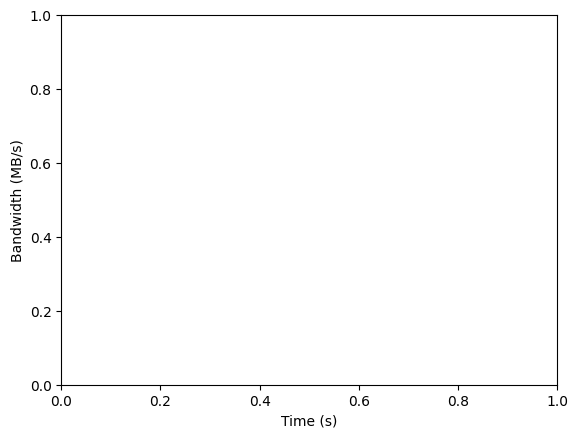

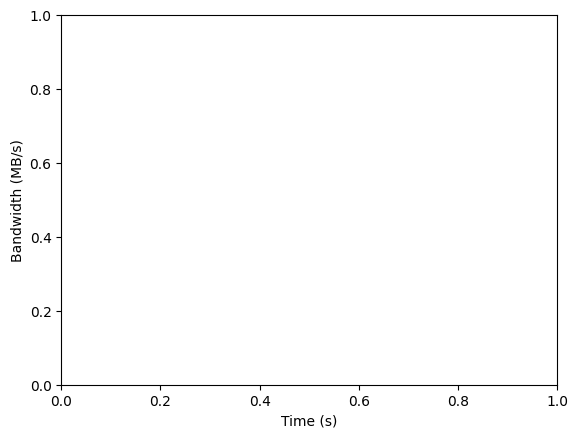

<Figure size 640x480 with 0 Axes>

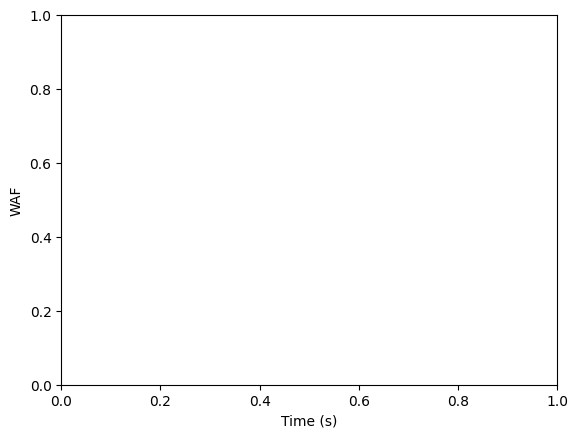

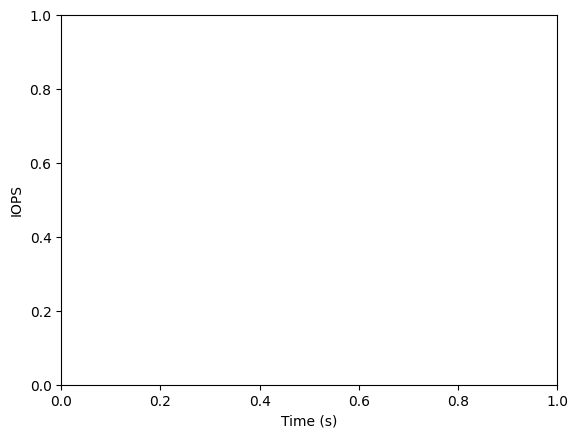

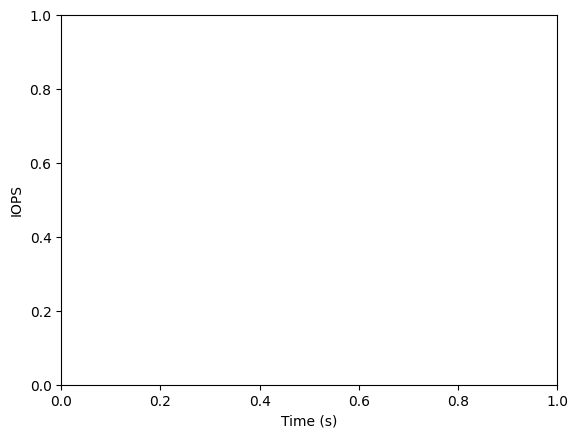

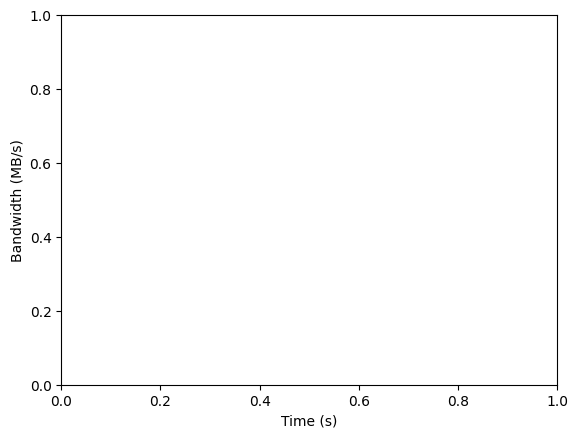

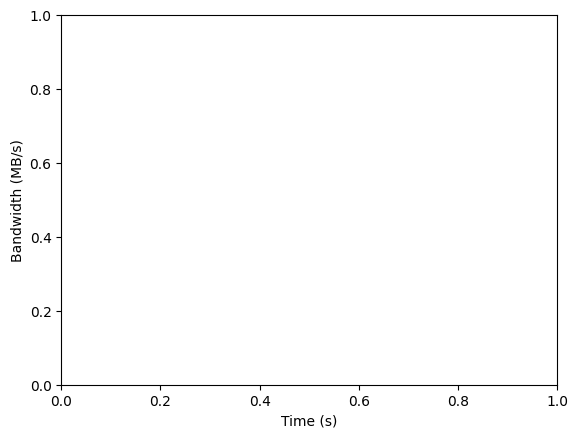

<Figure size 640x480 with 0 Axes>

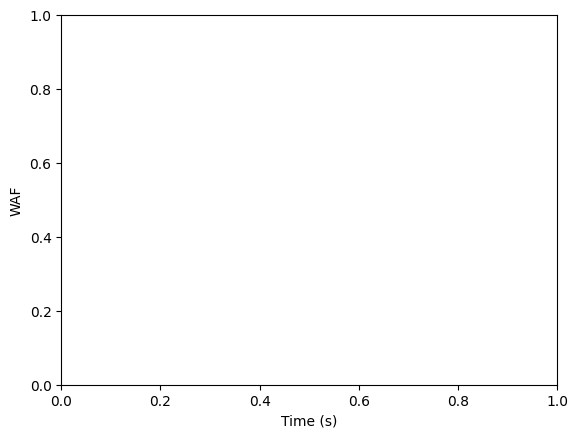

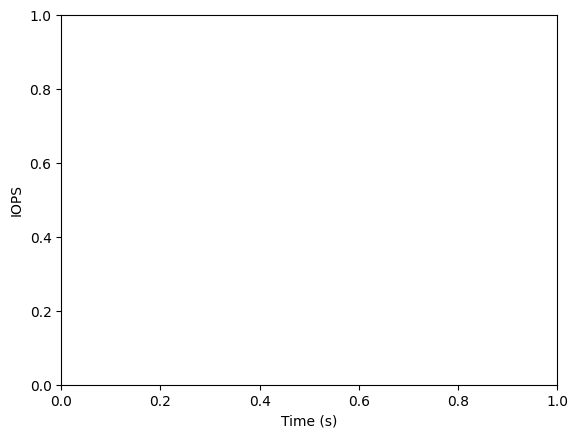

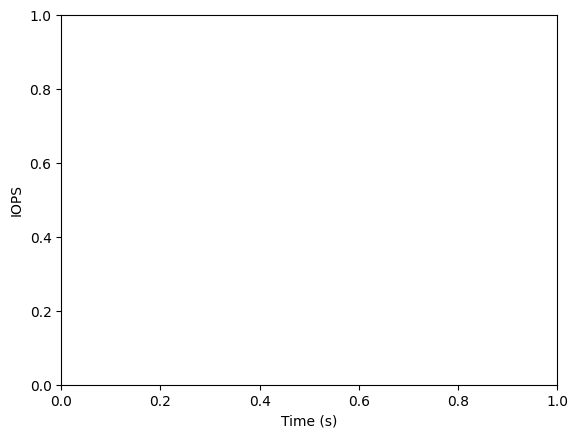

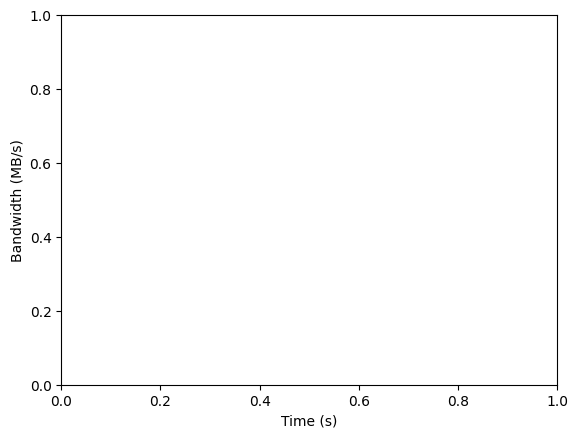

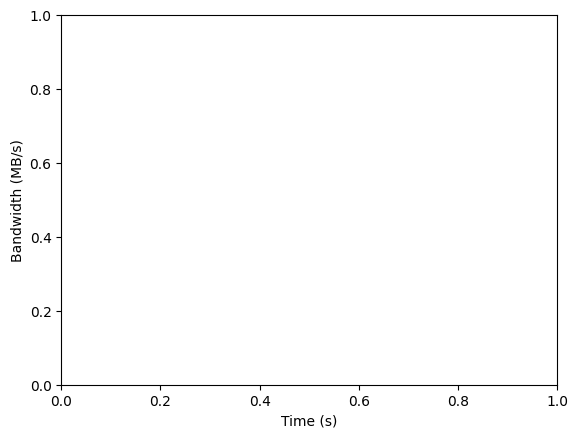

<Figure size 640x480 with 0 Axes>

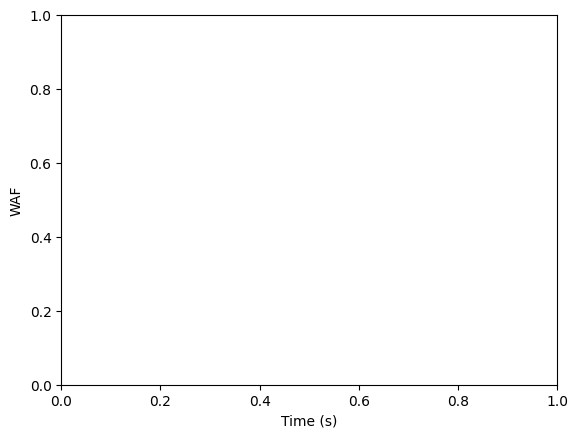

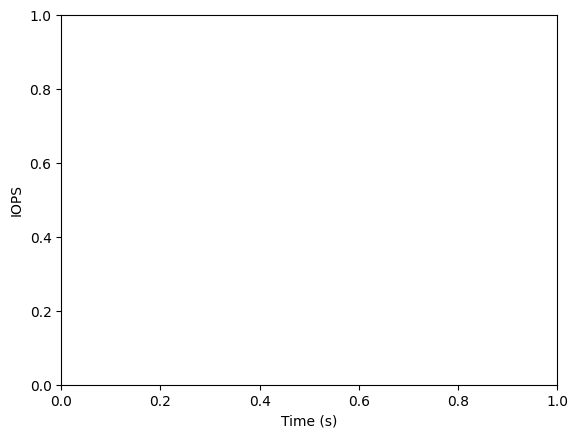

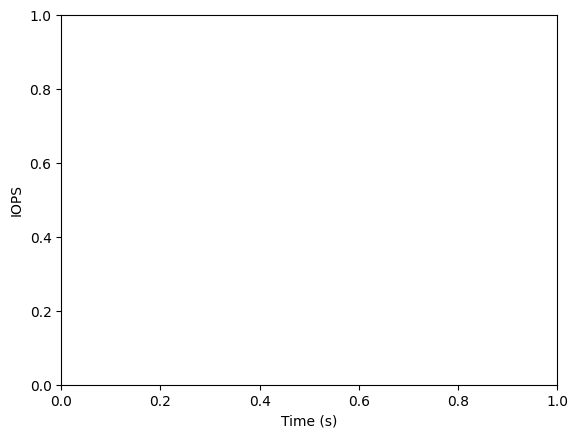

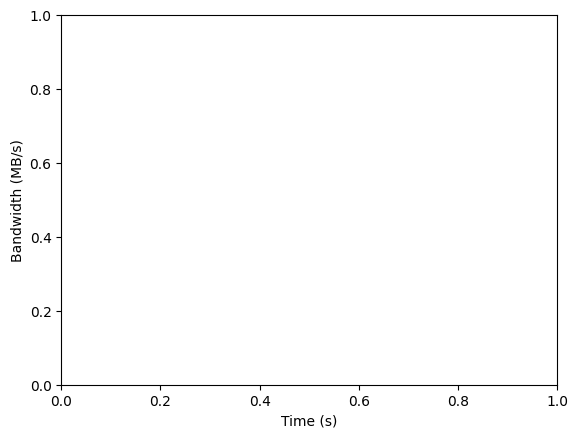

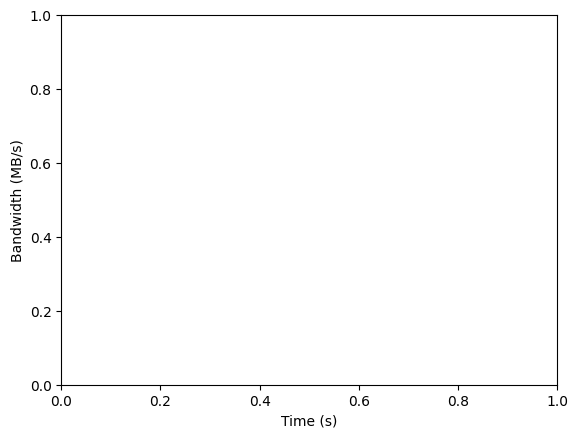

<Figure size 640x480 with 0 Axes>

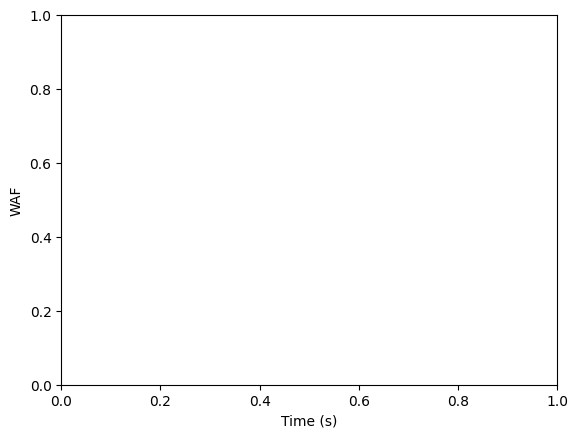

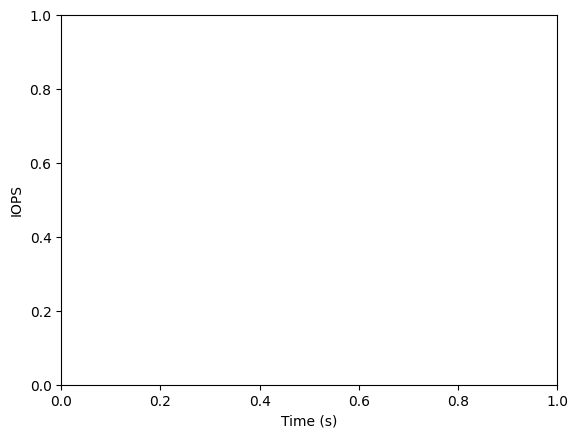

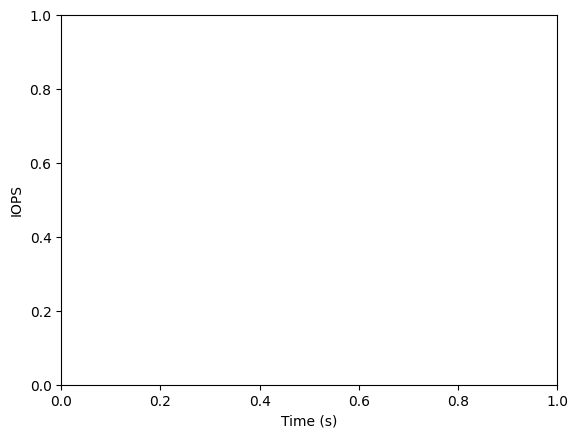

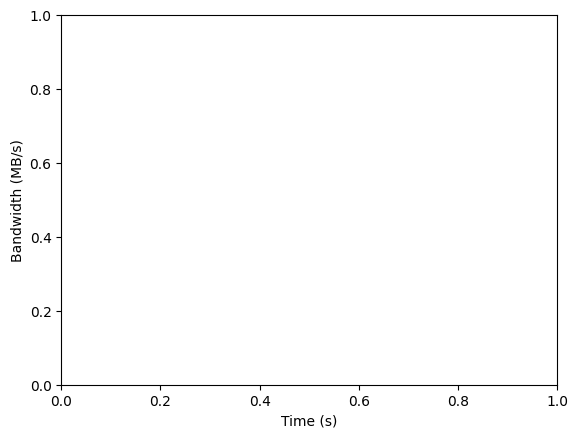

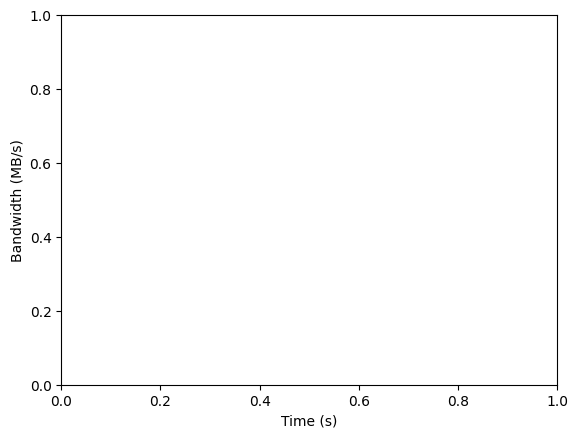

<Figure size 640x480 with 0 Axes>

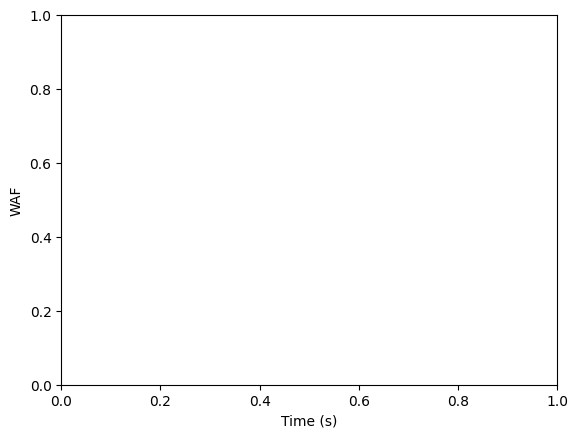

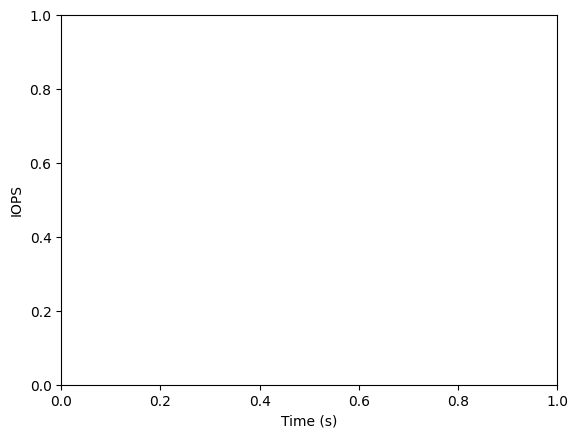

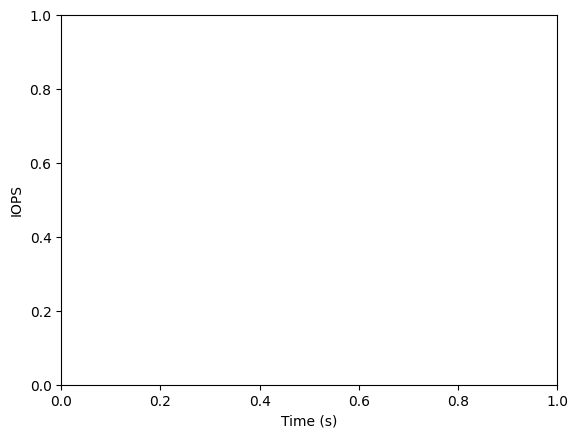

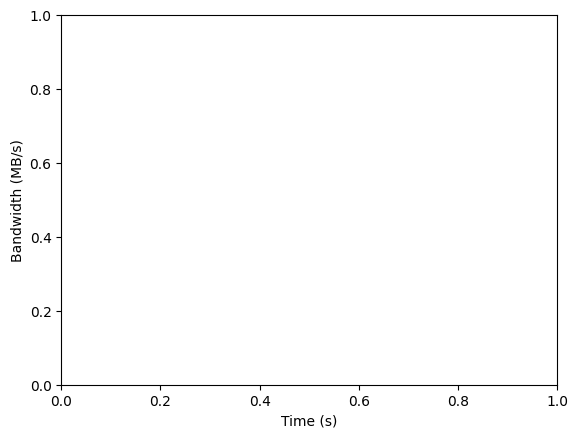

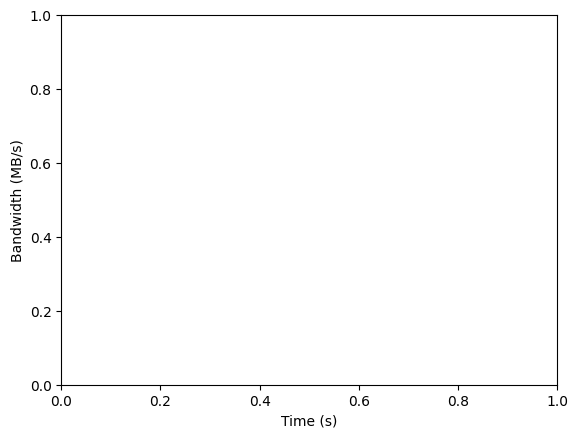

<Figure size 640x480 with 0 Axes>

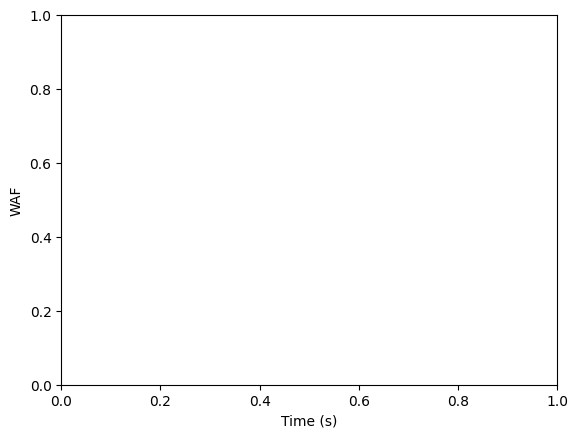

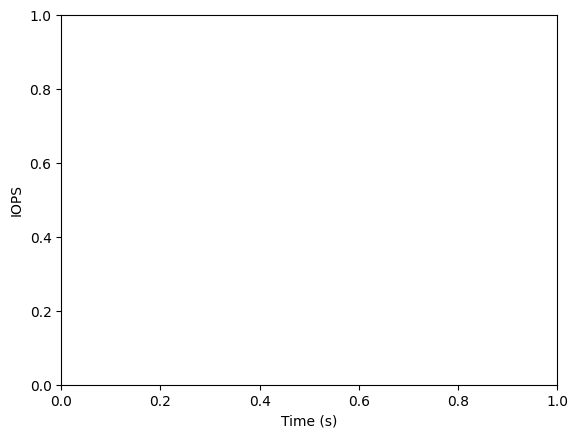

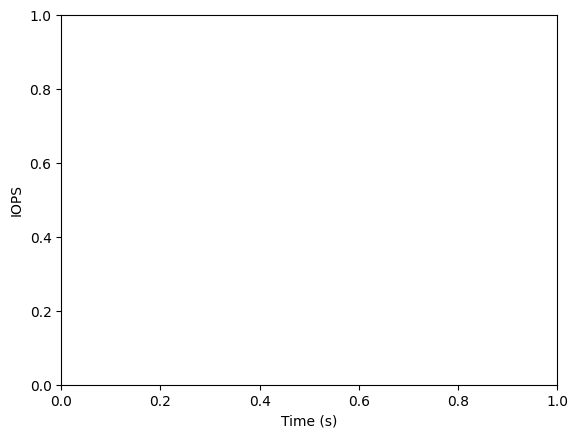

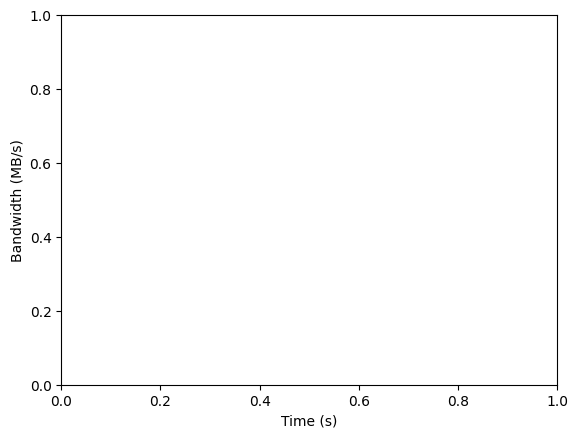

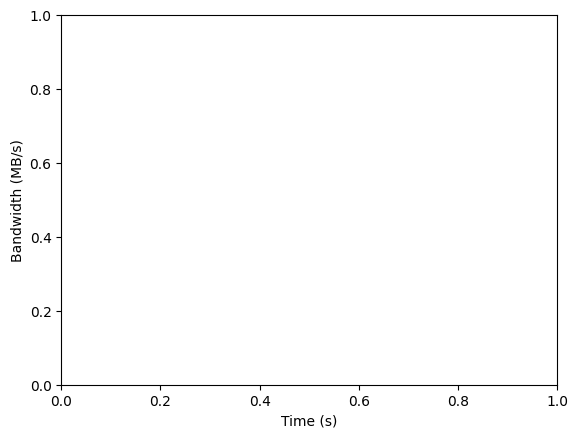

<Figure size 640x480 with 0 Axes>

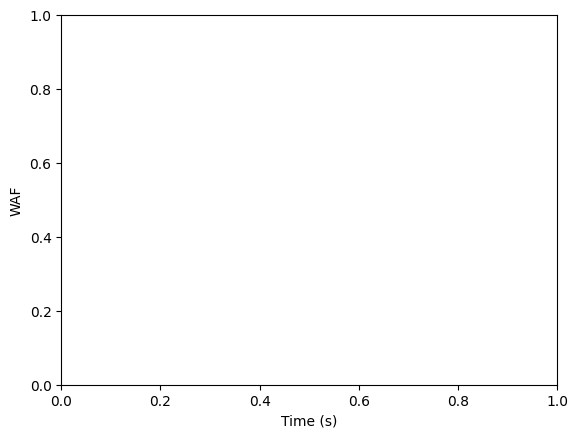

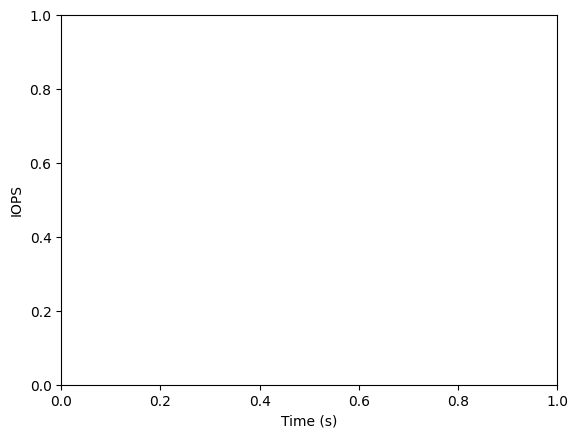

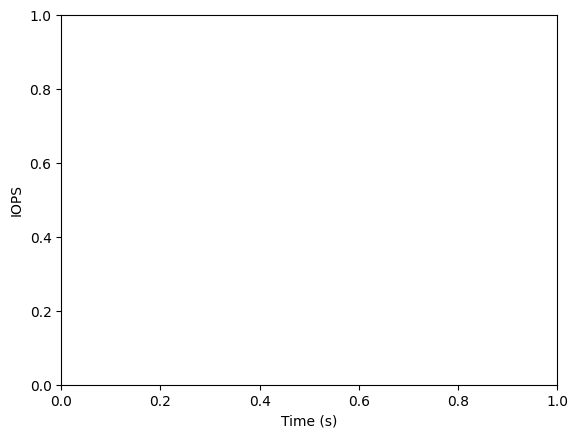

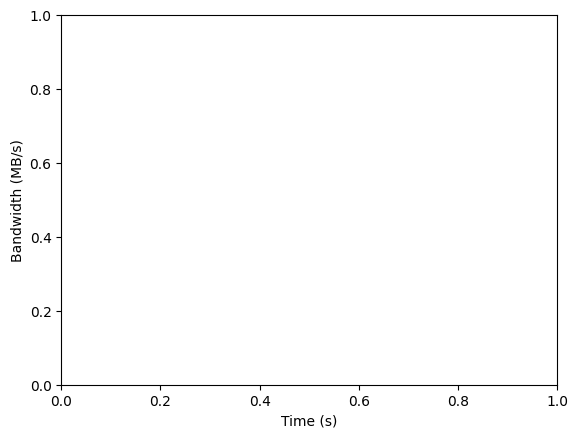

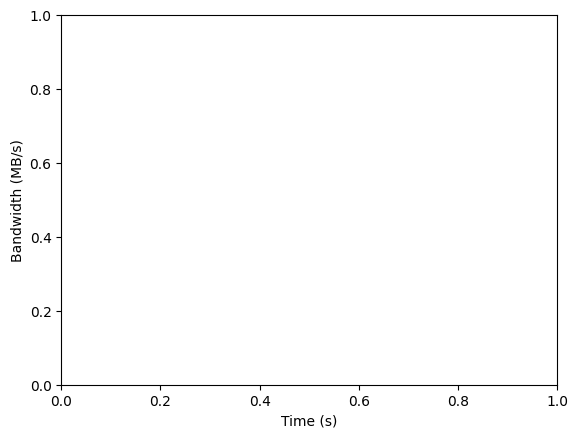

<Figure size 640x480 with 0 Axes>

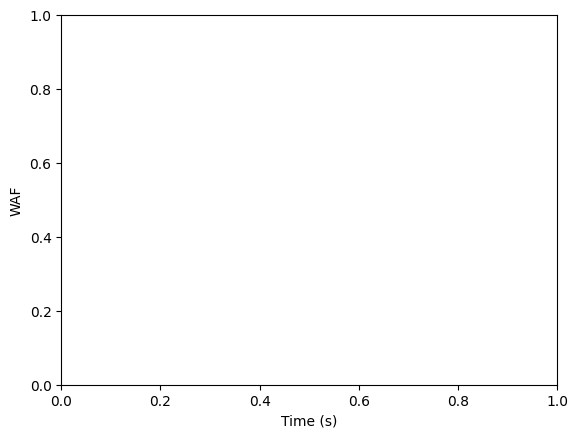

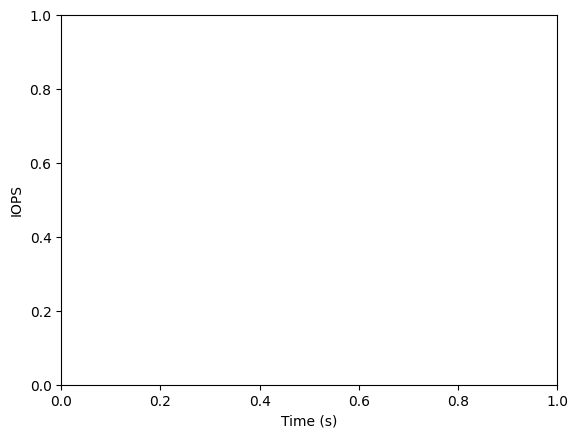

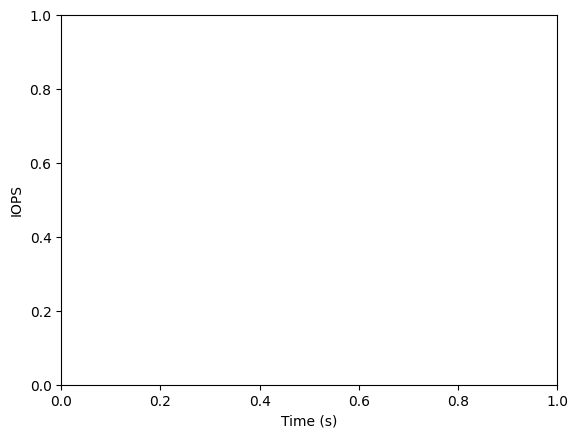

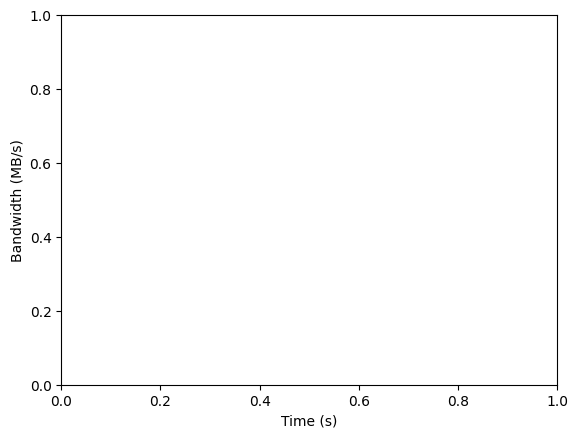

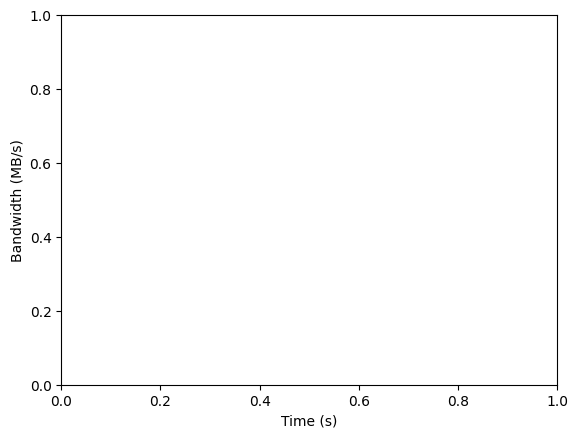

<Figure size 640x480 with 0 Axes>

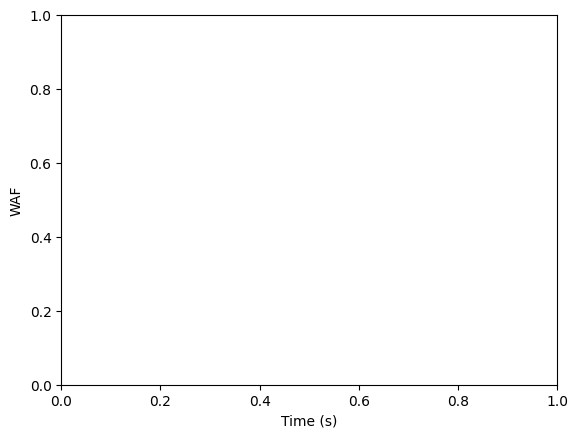

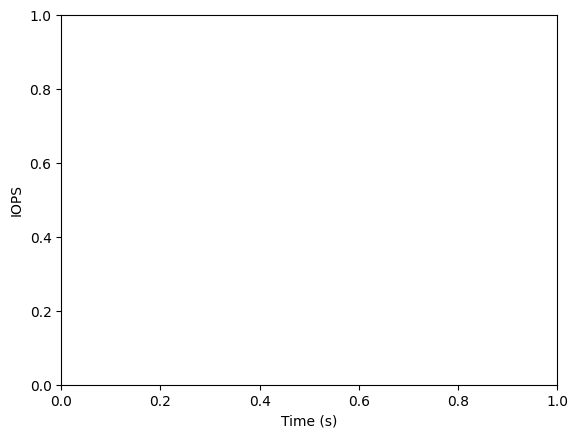

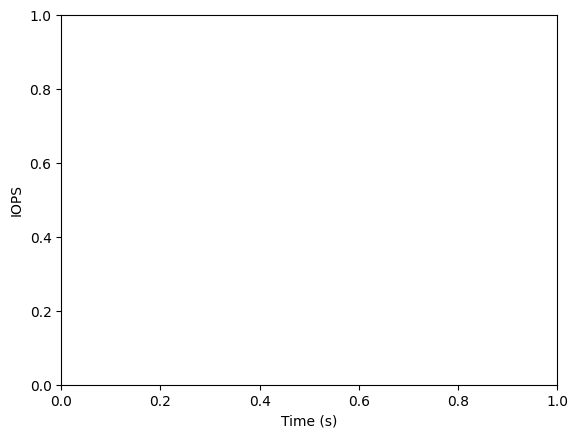

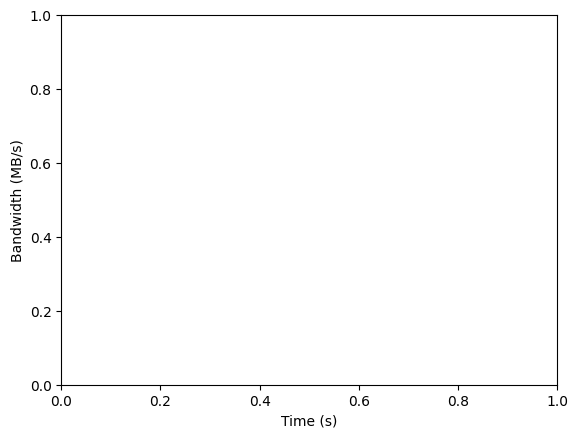

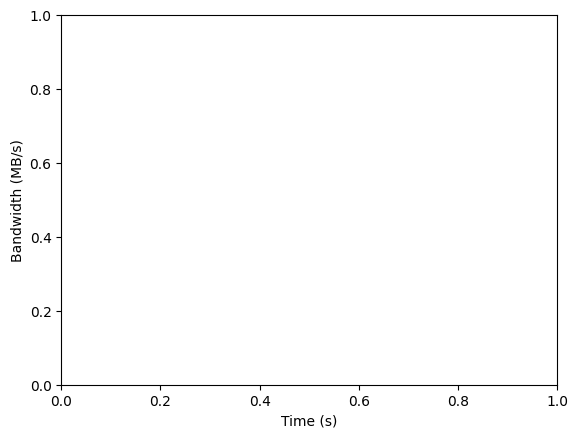

<Figure size 640x480 with 0 Axes>

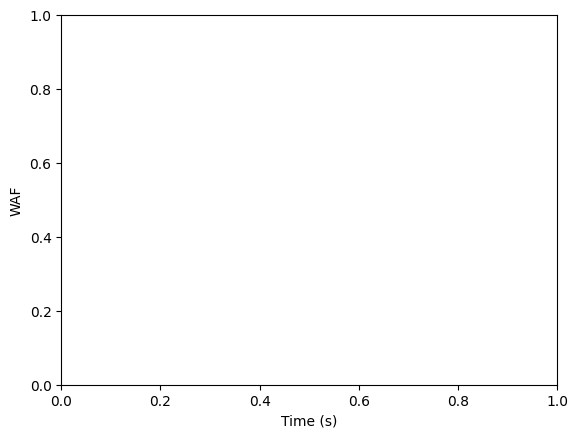

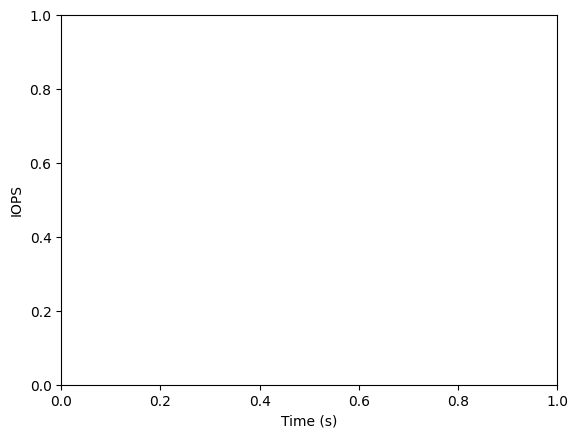

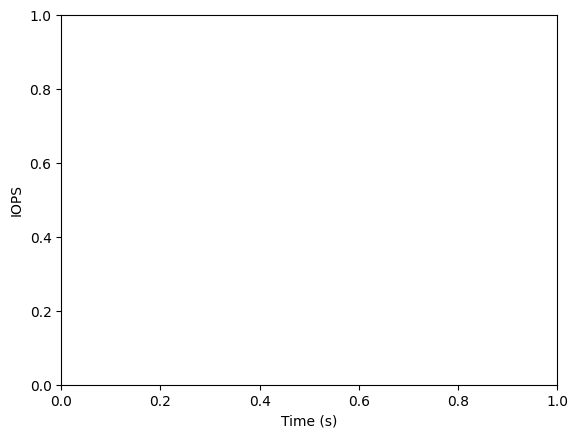

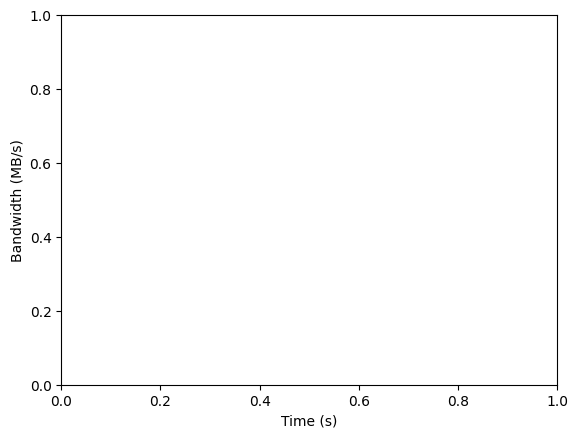

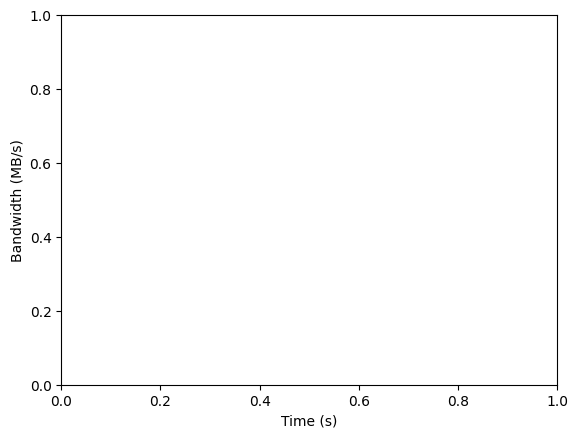

<Figure size 640x480 with 0 Axes>

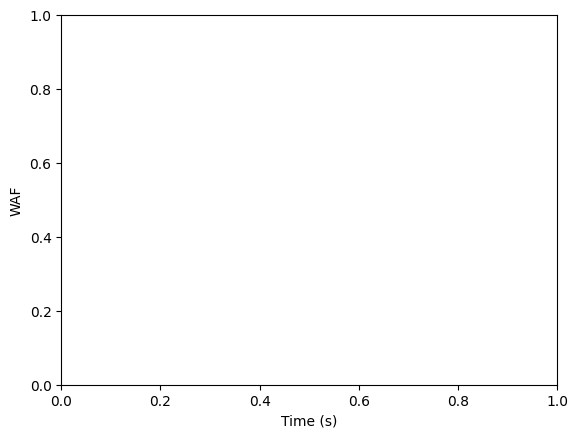

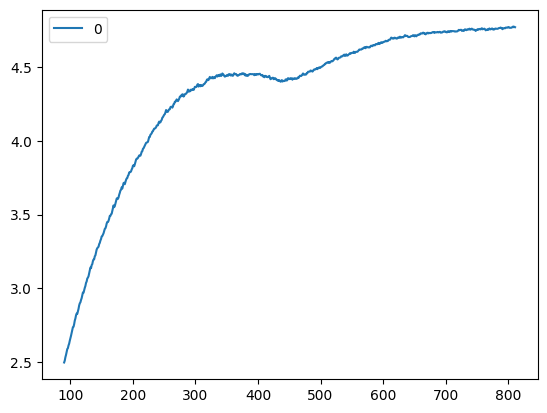

In [12]:
result_dics = []
for result_f in result_files:
    try:
        core_result_f = dump_core_log(result_f, section=3)
        f = result_f.split(os.sep)[-1].split(".job.out")[0]
        plot_dir = f"{HOME_DIR}/spdk/exp-0219/plot/result"
        if not os.path.exists(plot_dir):
            os.mkdir(plot_dir)
        save_dir = os.path.join(plot_dir, f)
        for metric in ["IOPS", "bw"]:
            plot_io(core_result_f, metric, save_dir)
        plot_stat_waf(core_result_f, save_dir)
        _, final_waf = plot_overall_waf(core_result_f, save_dir)
        iops, bw, latency = extract_fio(result_f)
        result_dics.append({
            "param": f,
            "IOPS": iops,
            "BW(MB/S)": bw,
            "latency": latency,
            "final_waf": final_waf,
        })
    except Exception as e:
        print(f"Error: {e}")
    finally:
        os.remove(core_result_f)
result_df = pd.DataFrame(result_dics)
print(result_df)
result_df.to_csv(os.path.join(f"{HOME_DIR}/spdk/exp-0219/result", f"{'-'.join(keywords)}.csv"), sep="\t")